## 机器学习
使用以往经验 E，完成特定的任务 T，并且使用通过评估性能 P 优化或改善经验 E。这里涉及到三部分内容：

* 经验 E
* 任务 T
* 性能 P

### 应用场景
<img src="https://tva1.sinaimg.cn/large/006y8mN6ly1g8htkaj9n6j31lw0s8u0x.jpg" alt="image-20191031235237013" style="zoom:30%;" />

<font color="grey" size=2>摘自：《Get Started with Machine Learning》</font>


### 机器学习过程
1. 学习历史数据
2. 通过识别数据模型/趋势以及关系
3. 对未来数据作出预测

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = np.linspace(-20, 20, 60)
label = np.power(data, 2) + 10

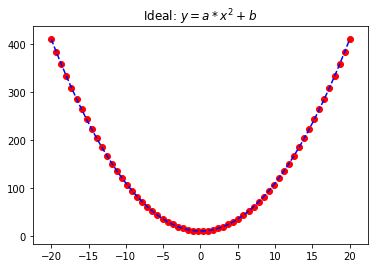

In [3]:
plt.plot(data, label, "--b")
plt.scatter(data, label, c="r")
plt.title("Ideal: $y=a * x^2+b$")
plt.show()

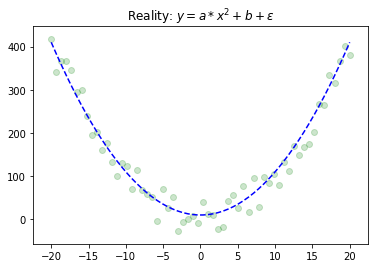

In [4]:
real_label = label + np.random.randint(-50, 40, data.shape[0])
plt.plot(data, label, "--b")
plt.scatter(data, real_label, c="g", alpha=.2)
plt.title("Reality: $y=a * x^2+b + \epsilon$")
plt.show()

不同于数学方程式，机器学习是需要数据，计算学习模型，验证模型效果，最终变为一个“技能”的过程。在“习得”模型的过程中，除了前面提到的训练数据集，还有训练模型的假设空间。通过不断地学习数据，选择算法进行学习检验，最终选择出“最好的”假设空间。

## 模型评估与选择
实际进行机器学习的过程中，不太可能得到一个“完美的”模型“完美”匹配到数据。这里可能的原因一方面是真实世界的系统误差产生的，另一方面是学习器的预测输出和样本的实际输出之间存在的误差——训练集上称为“训练误差/经验误差”，而新样本中的误差称为“泛化误差”。实际进行模型建立的过程中，系统误差是不可被人为控制的，需要解决的问题是降低经验误差的同时得到良好的泛化性能。

为了对模型进行有效的评估，需要选择相关的评估方法度量模型。机器学习中模型评估与模型选择中，会涉及到的相关知识：
1. Cross Validation
2. Grid Search
3. 学习曲线
4. 评估指标

### Cross Validation
是一种统计学上将数据样本切割成较小子集的实用方法。于是可以先在一个子集上做分析， 而其它子集则用来做后续对此分析的确认及验证。 一开始的子集被称为训练集。而其它的子集则被称为验证集或测试集。用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合，同时可以延伸应用到测试数据的表现

<img src="https://pic1.zhimg.com/80/v2-c8a5262dda0b9677b8c075f5f64008c0_hd.png" alt="KXlTTP.jpg" border="0" style="zoom:70%;"/>

<font color="grey" size=2>摘自：<a href="https://zhuanlan.zhihu.com/p/25637642">《网格搜索算法与K折交叉验证》</a></font>

将数据分成训练集，验证集，测试集，在我们收集到数据后，通常用70%-80%的数据作为训练集，用剩下20%-30%的数据作为测试集。一般情况下训练集和测试集均要含有各种样本数据，因此一般情况下会进行“洗牌”，然后再分成训练集和测试集。验证集是训练集又分出来的20%-30%，验证集的作用是什么？使用训练集训练模型，验证集检验模型用来挑选挑选最合适的模型。得到的模型再进行测试集测试，体现模型的泛化能力。

**K-fold 交叉验证**：
<img src="https://tva1.sinaimg.cn/large/006y8mN6ly1g8kvz9yzcvj30hn095myd.jpg" alt="image-20191103153258107" style="zoom:70%;" />

In [5]:
import sklearn
print("Scikit Learn version: ", sklearn.__version__)

Scikit Learn version:  0.21.1


In [6]:
from sklearn.model_selection import KFold

# 模拟数据
data = np.arange(1, 15)
label = np.power(data, 2) + 10 + np.random.randint(-5, 8, data.shape[0])

# k fold index
kf = KFold(n_splits=4, random_state=42, shuffle=True)

for fold, (train_index, validate_index) in enumerate(kf.split(data)):
    print("Fold {}:".format(fold + 1))
    print("\tTrain Data: {}, validate data: {}".format(data[train_index], data[validate_index]))
    print("\tTrain label: {}, validate label :{}".format(label[train_index], label[validate_index]))

Fold 1:
	Train Data: [ 2  3  4  5  6  7  8  9 11 14], validate data: [ 1 10 12 13]
	Train label: [ 10  26  23  35  46  65  79  90 136 206], validate label :[ 16 106 150 177]
Fold 2:
	Train Data: [ 1  4  5  7  8 10 11 12 13 14], validate data: [2 3 6 9]
	Train label: [ 16  23  35  65  79 106 136 150 177 206], validate label :[10 26 46 90]
Fold 3:
	Train Data: [ 1  2  3  4  6  7  9 10 11 12 13], validate data: [ 5  8 14]
	Train label: [ 16  10  26  23  46  65  90 106 136 150 177], validate label :[ 35  79 206]
Fold 4:
	Train Data: [ 1  2  3  5  6  8  9 10 12 13 14], validate data: [ 4  7 11]
	Train label: [ 16  10  26  35  46  79  90 106 150 177 206], validate label :[ 23  65 136]


### Grid Search
Grid search 涉及到模型中超参数概念。模型超参数是外部的配置，数值不是通过数据估计得到；而模型参数就是模型内部的配置变量，模型参数是模型训练过程中运算得到的。网格搜索的重要作用是将超参数进行不同的组合，将所有参数组合都训练达到找到最佳模型组合

In [7]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier


In [8]:
df = pd.read_csv("./Data/L1_ml_basic.csv")
X = df.loc[:, ["x1", "x2"]].to_numpy()
y = df.loc[:, "y"].to_numpy()

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42)

#  model
cls = DecisionTreeClassifier(random_state=42)

# 网格搜索参数
param_drid = {
    "max_depth": range(2, 5),    
}

# 评估指标
acc_score = make_scorer(accuracy_score)
f_score = make_scorer(f1_score)
scoring = {"accuracy": acc_score, "f1": f_score}

# 使用 grid search
grid = GridSearchCV(cls, param_drid, scoring, cv=2, refit="accuracy")
grid.fit(X_train, y_train)

best_cls = grid.best_estimator_

print('Best train score: %f'%grid.best_score_)
for key in param_drid.keys():
    print('Best parameter %s: %d'%(key, best_cls.get_params()[key]))

print('Test score: %f' % best_cls.score(X_test, y_test))

Best train score: 0.850000
Best parameter max_depth: 4
Test score: 0.800000


### 学习曲线
学习曲线是一种很好的工具，可以使用学习曲线来判断某一个学习算法是否处于偏差、方差问题。学习曲线是学习算法的一个很好的合理检验(sanity check)。学习曲线是将训练集误差和验证集误差作为训练集实例数量(𝑚)的函数绘制的图表。

假设有 100 行数据，从第 1 行数据开始，逐渐学习更多行的数据。核心内容是: 当训练较少行数据的时候，训练的模型将能够非常完美地适应较少的训练数据，但是训练出来的模型却不能很好地适应验证集数据或测试集数据。利用学习曲线可以较好的判断**欠拟合**和**过拟合**，同时可以作为判断是否有必要增加样本量的工具：

<img src="https://tva1.sinaimg.cn/large/006y8mN6ly1g8ky2rvsi8j30vs0f6tfu.jpg" alt="image-20191103164108385" style="zoom:60%;" />

---
上图中欠拟合的学习曲线既体现了**高偏差**，训练误差和验证集误差虽然相近，但两者误差都比较高。即使是样本容量再增大也不可能降低误差。


对于**高方差**的体现了过拟合的结果，训练集的误差比较小，而验证集误差还是比较高——所以可能的因素是训练数据量低，通过增加训练数据提高算法效果

---
<img src="https://tva1.sinaimg.cn/large/006y8mN6ly1g8ky858t87j30u60g00zo.jpg" alt="img" style="zoom:50%;" />

**同样通过学习曲线可以用于找到 Just Right Case**：随着样本量增加，训练误差虽然再增加，但是增加幅度不是特别大的同时验证集误差在快速下降的，两者的误差都比较小

---
<img src="https://tva1.sinaimg.cn/large/006y8mN6ly1g8kyhbu5h8j30rs0baq64.jpg" alt="img" style="zoom:80%;" />

### 评估指标
<img src="https://tva1.sinaimg.cn/large/006y8mN6ly1g8kz44jncaj30d106jwfa.jpg" alt="image-20191103172127831" style="zoom:80%;" />

1. 精确率（Precision），或者说查准率，挑出的西瓜中好瓜的比例：

    $precision=\frac{TP}{TP+NP}$
2. 召回率（Recall），或者说查全率，所有的好瓜中被挑选出来的比例：

    $recall=\frac{TP}{TP+FN}$
    
3. ROC（受试者工作特征曲线）伪阳性率（FPR）定义为 X 轴，真阳性率（TPR）定义为 Y 轴构成的图形。
    * TPR：在所有实际为阳性的样本中，被正确地判断为阳性之比率 $TPR = \frac{TP}{TP + FN}$
    * FPR：在所有实际为阴性的样本中，被错误地判断为阳性之比率。$FPR = \frac{FP}{FP + TN}$ 

通过给定一个二元分类模型和它的阈值，就能从所有样本的（阳性／阴性）真实值和预测值计算出一个 (X=FPR, Y=TPR) 座标点。
通常 ROC 和 AUC 是配合一起使用，AUC 为 ROC 下方的面积。如果 AUC 越大，那么模型越好。

In [9]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# 增加噪音
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, shuffle=True)

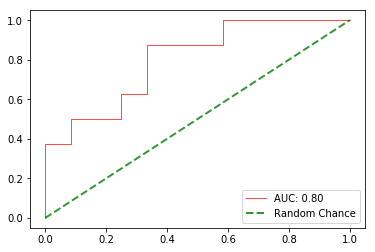

In [10]:
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=42)

mean_fpr = np.linspace(0, 1, 100)
y_pred = classifier.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])

# 计算 ROC 和 AUC
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1,alpha=0.7, color="r", label="AUC: %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g',
         label='Random Chance', alpha=.8)
plt.legend(loc=0)
plt.show()